# TP1

## Análisis Exploratorio y Preprocesamiento de Datos

### Exploración Inicial

In [3]:
#Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Modelo Lineal
from sklearn.linear_model import LinearRegression

#Metricas para evaluar modelos
from sklearn import metrics

print(np.__version__)

1.21.6


In [4]:
import pandas as pd

properati = pd.read_csv('./properati_argentina_2021.csv')

In [5]:
properati.shape

(460154, 20)

Hay 460154 filas y 20 columnas

In [6]:
properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

Mostramos un poco de informacion en general del dataset

In [7]:
properati.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Estos son los tipos de las 20 columnas

In [8]:
properati.isnull().sum()

id                               0
start_date                       0
end_date                         0
created_on                       0
latitud                      40414
longitud                     40414
place_l2                         0
place_l3                     22489
place_l4                    321134
place_l5                    457724
place_l6                    460154
operation                        0
property_type                    0
property_rooms               91656
property_bedrooms           116041
property_surface_total       62341
property_surface_covered     32238
property_price               18001
property_currency            18564
property_title                   0
dtype: int64

Vemos que hay filas con datos faltantes

FILTRADO DE DATASET:

In [95]:
#FILTRADO QUE PIDE EL ENUNCIADO
properati_casa_depto = properati[properati.property_type.isin(['Casa', 'PH','Departamento'])]
properati_zona = properati_casa_depto[properati_casa_depto.place_l2.isin(['Capital Federal'])]
properati_operacion = properati_zona[properati_zona.operation.isin(['Venta'])]
properati_limpio = properati_operacion[properati_operacion.property_currency.isin(['USD'])]
properati_limpio.shape

#FILTRADO DE VALORES NEGATIVOS
indice_negativo=properati_limpio[properati_limpio['property_price']<0].index
properati_limpio.drop(indice_negativo, inplace=True)

indice_negativo=properati_limpio[properati_limpio['property_surface_total']<0].index
properati_limpio.drop(indice_negativo, inplace=True)

indice_negativo=properati_limpio[properati_limpio['property_rooms']<0].index
properati_limpio.drop(indice_negativo, inplace=True)

indice_negativo=properati_limpio[properati_limpio['property_bedrooms']<0].index
properati_limpio.drop(indice_negativo, inplace=True)



0        True
1        True
3        True
5        True
6        True
         ... 
75389    True
75392    True
75393    True
75395    True
75396    True
Name: property_type, Length: 58840, dtype: bool

Realizamos filtrado por:
*   Tipo de propiedad
*   Zona, que corresponda a capital
*   Tipo de Operación
*   Tipo de moneda


Tomamos en cuenta que es excluyente que los datos no tengan datos faltantes para realizar este primer filtro
Vemos que el dataframe reduce su tamaño.

In [10]:
#CON ESTE COMANDO SE GUARDA
#properati_limpio2 = pd.DataFrame(properati_limpio)
#properati_limpio2.to_csv('properatilimpio.csv',index = False)

Cambiamos el tipo de dato del atributo place_l6 a object, ya que tiene muchos datos faltantes y como era de tipo float se incluia en todos los analisis de tipo cuantitativo,
dandonos medidas irrelevantes

Cambiamos el tipo de dato de los atributos rooms y bedrooms a int, ya que al ser atributos de tipo cuantitativos discretos (ya que no puede haber por ejemplo 1,5 habitaciones), no queremos que existan numeros decimales en estas columnas

In [11]:
from matplotlib import figure

properati_limpio["place_l6"] = properati_limpio["place_l6"].astype(object)

print(properati_limpio.dtypes)

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                     object
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Vemos que las columas *start_date, end_date y created_on* son tipo OBJECT, lo cual decidimos pasarlo a su tipo de dato correspondiente el cual es *datetime*

In [12]:
#properati_limpio['start_date'].unique().size
#properati2 = pd.to_datetime(properati_limpio['start_date'])
#properati2.unique()

In [13]:
print(properati_limpio.describe())

            latitud      longitud  property_rooms  property_bedrooms  \
count  90518.000000  90518.000000    93204.000000       83261.000000   
mean     -34.591481    -58.449794        2.822808           2.014665   
std        0.181720      0.292632        1.426153           1.129726   
min      -53.788624    -71.471192        1.000000           1.000000   
25%      -34.615975    -58.466521        2.000000           1.000000   
50%      -34.595790    -58.439000        3.000000           2.000000   
75%      -34.577413    -58.408862        4.000000           3.000000   
max      -24.219827    -54.133330       40.000000          70.000000   

       property_surface_total  property_surface_covered  property_price  
count            89404.000000              90894.000000    9.424800e+04  
mean               109.093508                 87.932427    2.262393e+05  
std                980.407446                990.932569    3.186050e+05  
min                 10.000000                  1.000000

Mostramos las medidas de resumen de las variables cuantitativas continuas. Nos interesa principalmente para la cantidad de ambientes y habitaciones, las superficies y el precio de las propiedades.

La cantidad de valores posibles para el tipo de propiedad es 3.


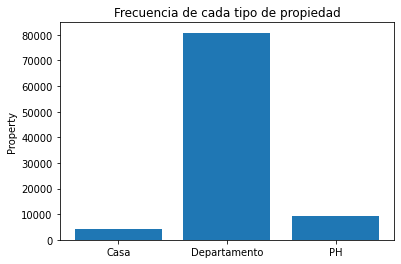

La cantidad de valores posibles para los barrios es 57.


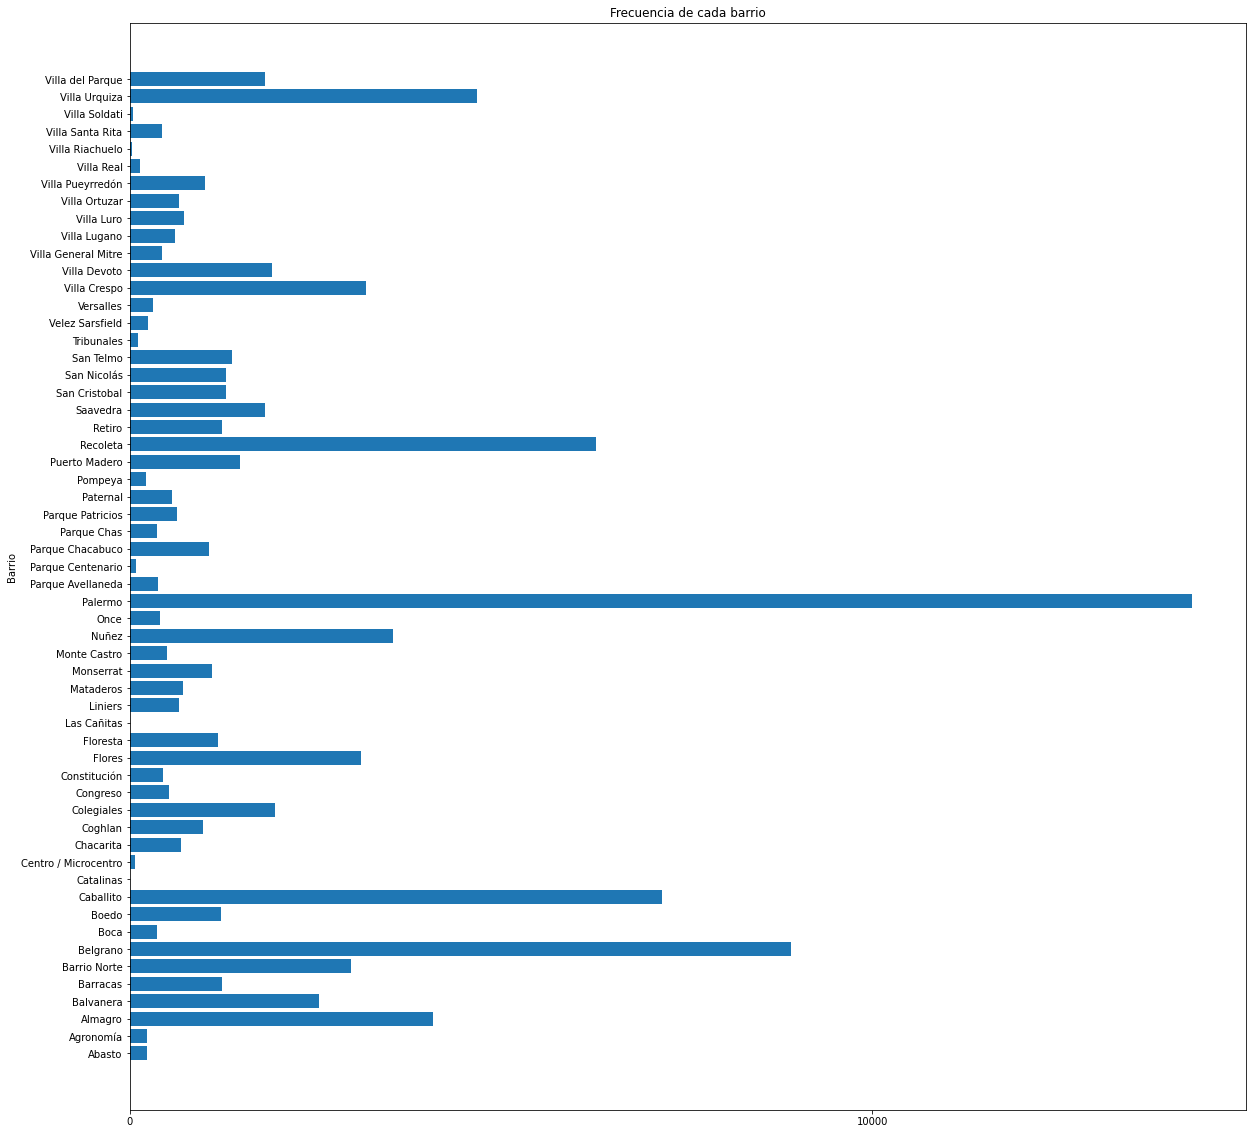

In [14]:
ds_agrupado_property_type=properati_limpio.groupby(['property_type']).count()  #Calculo la frecuencia de cada tipo de propiedad

eje_y = ds_agrupado_property_type["id"].tolist() # Tomamos del ds de tipos de propiedad la columna "id" porque sabemos que todas las propiedades cuentan con ella

eje_x = ds_agrupado_property_type.index.tolist() # Tomamos todos los tipos de propiedades

print("La cantidad de valores posibles para el tipo de propiedad es " + str(len(eje_x)) + ".")

plt.locator_params('x', nbins=3)
plt.bar(eje_x, eje_y)

plt.ylabel('Property')
plt.title('Frecuencia de cada tipo de propiedad')
 
plt.show()

ds_agrupado_place_l3=properati_limpio.groupby(['place_l3']).count()  #Calculo la frecuencia de cada barrio

eje_y = ds_agrupado_place_l3["id"].tolist() # Tomamos del ds de barrios la columna "id" porque sabemos que todas las propiedades cuentan con ella

eje_x = ds_agrupado_place_l3.index.tolist() # Tomamos todos los posibles barrios

print("La cantidad de valores posibles para los barrios es " + str(len(eje_x)) + ".")

plt.figure(figsize=(20, 20))
plt.locator_params('x', nbins=3)
plt.barh(eje_x, eje_y)
plt.ylabel('Barrio')
plt.title('Frecuencia de cada barrio')
plt.show()

Analizamos las variables cualtiativas, indicando la cantidad de valores posibles y su frecuencia.

In [15]:
properati_limpio.head(5)

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
25,CyZu6IaZgmQYGk8jmPajCg==,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
49,vuX/ccLAMVml4qWRFcOJUA==,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
51,ZTtSCeqZ3HUgf5jjwEzRcw==,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,NaN,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


Observando algunas de las filas del dataset limpio podemos observar que tanto el id como el título de las propiedades son variables irrelevantes para el análisis.

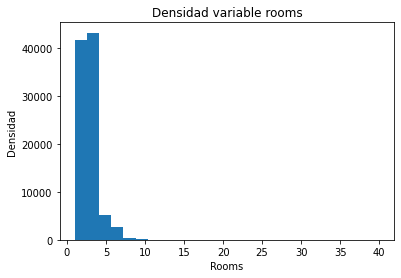

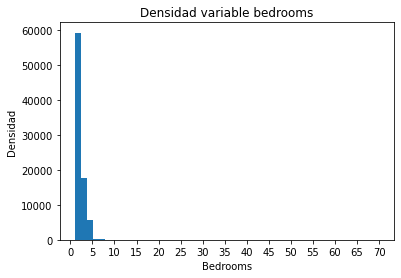

In [16]:
#Distribucion de:

#Ambientes

plt.title('Densidad variable rooms')
plt.hist(properati_limpio['property_rooms'], bins = 25 , alpha = 1)
plt.xlabel("Rooms")
plt.ylabel("Densidad")
plt.show()

#Habitaciones

plt.title('Densidad variable bedrooms')
plt.hist(properati_limpio['property_bedrooms'],  bins = 50 , alpha = 1)
plt.locator_params("x", nbins=30)
plt.xlabel("Bedrooms")
plt.ylabel("Densidad")
plt.show()

Ambos graficos de distribucion nos dicen que la cantidad de ambientes y habitaciones ronda entre 0 y 5 en la mayoria de las propiedades. Tambien se observan valores atipicos: Propiedades con 40 ambientes y 70 habitaciones a los que hay que hacerle un tratamiento para que el grafico sea mas claro modificando/eliminando estos valores que hacen complicada la interpretacion del grafico.

Un buen tratamiento para los datos faltantes de las variables del numero de habitaciones y ambientes seria una regresion lineal con el precio de la propiedad, es decir que en base a su precio se calcule la cantidad de ambientes y habitaciones.

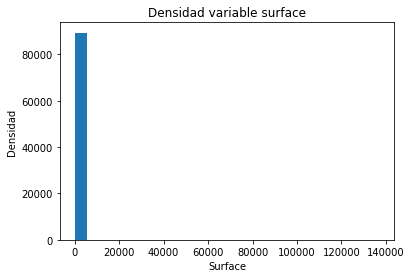

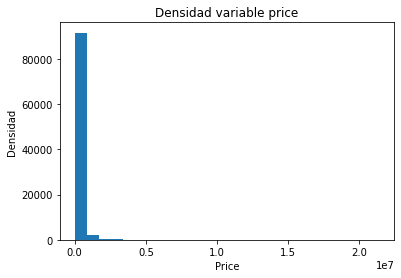

In [17]:
#Superficie
plt.title('Densidad variable surface')
plt.hist(properati_limpio['property_surface_total'], bins = 25 , alpha = 1)
plt.xlabel("Surface")
plt.ylabel("Densidad")
plt.show()

#Precio
plt.title('Densidad variable price')
plt.hist(properati_limpio['property_price'], bins = 25 , alpha = 1)
plt.xlabel("Price")
plt.ylabel("Densidad")
plt.show()


TODO: Realizar un análisis gráfico de las distribuciones de las variables superficie y precio. (esto ya está hecho arriba no?)


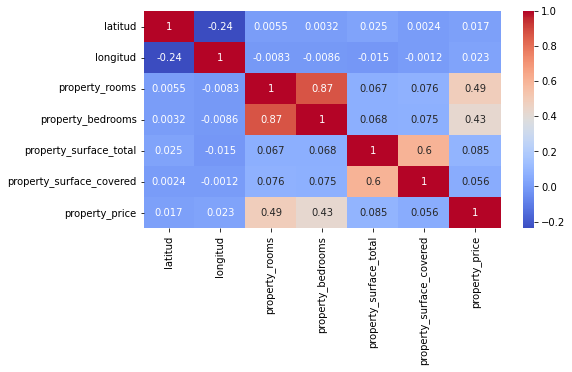

In [18]:
#Heatmap de la correlacion de Pearson entre las variables

matriz_corr_properati = properati_limpio.corr()

plt.figure(figsize = (8,4))
sns.heatmap(matriz_corr_properati, annot = True, cmap='coolwarm')
plt.show()

Como vemos en el mapa de calor las variables de cantidad de habitaciones y cantidad de ambientes estan furtemente correlacionadas ya que el valor de su correlacion de Pearson es cercano a 1.

TODO: A partir de este análisis generar conclusiones sobre los datos.

### Datos Faltantes

[Text(0, 0.5, 'Variables'),
 Text(0.5, 0, 'Porcentaje de datos faltantes'),
 Text(0.5, 1.0, 'Porcentaje de datos faltantes por cada variable')]

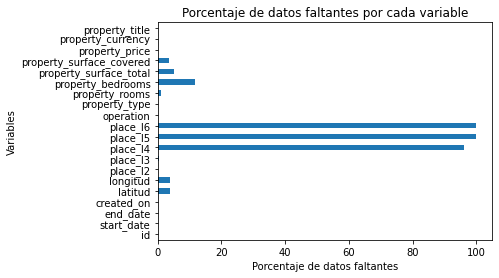

In [29]:
#Porcentaje de datos faltantes por columna
porcentaje_faltante_por_columna = (properati_limpio.isnull().sum()/len(properati_limpio))*100
porcentaje_faltante_por_columna.plot(kind='barh').set(title="Porcentaje de datos faltantes por cada variable", xlabel="Porcentaje de datos faltantes", ylabel="Variables")

Al graficar el porcentaje de datos faltantes por cada variable podemos observar que los valores de place_l4, place_l5, place_l6 se ausentan en la gran mayoría de los casos y que otras columnas como property_bedrooms, property_surface_total, propert_surface_covered, longitud, latitud y property_rooms tienen información faltante en una pequeña cantidad de registros de propiedades. 

In [21]:
## porcentaje datos faltantes por fila

datos_porcentaje_faltante = pd.DataFrame() 
cantidad_variables = 20

for i in range (0,len(properati_limpio)):

  nueva_fila = {'id': i, 'porcentaje_faltante_por_fila':(properati_limpio.iloc[i].isnull().sum().sum()* 100) / cantidad_variables }
  datos_porcentaje_faltante = datos_porcentaje_faltante.append(nueva_fila, ignore_index = True)

In [22]:
datos_porcentaje_faltante.head(5)

,id,porcentaje_faltante_por_fila
0,0.0,30.0
1,1.0,15.0
2,2.0,15.0
3,3.0,20.0
4,4.0,20.0


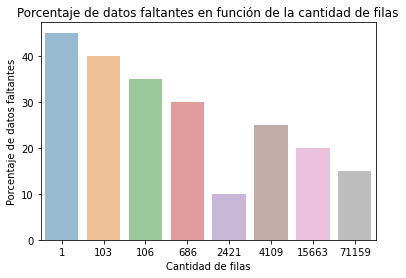

In [23]:
df_agrupado_porcentaje_faltante_por_fila = datos_porcentaje_faltante.groupby(['porcentaje_faltante_por_fila']).count()  #Calculo la frecuencia de cada porcentaje

eje_y = df_agrupado_porcentaje_faltante_por_fila.index.tolist() 

eje_x = df_agrupado_porcentaje_faltante_por_fila['id'].tolist()

sns_bar_plot =sns.barplot(x=eje_x, y=eje_y, data=df_agrupado_porcentaje_faltante_por_fila ,alpha=0.5).set(title = "Porcentaje de datos faltantes en función de la cantidad de filas", ylabel='Porcentaje de datos faltantes', xlabel='Cantidad de filas')


Graficamos el porcentaje de datos faltantes por fila y podemos concluir que éste ronda entre el 10 y el 40% en todos los casos, pero que la mayoría de los registros cuentan con entre un 15 y un 25% de información ausente. Además podemos observar que ninguna fila cuenta con el 100% de los datos completos.

Deducimos que los datos faltantes en los casos de place_l3, place_l4, place_l5 y place_l6 son "Missing At Random" porque estos especifican la ubicacion de las propiedades, por
lo que algunas cuentan con mas informacion que otras. En los casos de las que estan ubicadas en Palermo, existe varios sectores dentro de este barrio (Palermo Viejo, Nuevo, etc) que se pueden especificar en el atributo place_l4 pero por ejemplo barrios mas chicos como Villa Crespo no cuentan con estos sectores, por lo que en esos casos el atributo place_l4 queda nulo.

Luego en los casos de los datos faltantes de latitud, longitud, bedrooms, rooms, surface total y surface covered son "Missing Completely at Random" porque no hay ninguna relacion con los demas datos por la cual faltan.

Por lo que para tratar estos casos de datos faltantes se van a usar distintos metodos de imputacion.

Desarrollamos distintas estrategias para reparar los valores faltantes:

Para los datos de LATITUD Y LONGITUD podriamos usar la ubicacion geografia del barrio en que se encuentran (y si contamos con la ubicacion del sector especifico del barrio mejor) para por medio de datos externos imputar sus coordendas.

Para el caso de BEDROOMS se podria usar el metodo de imputacion de hot deck para deducir este dato a partir de la cantidad de ambientes de la propiedad y tomar su valor mas frecuente de dormitorios, o la media, etc. Lo mismo pero al reves para los valores faltantes de ROOMS.

Ahora bien para el caso de SUPERFACE (TOTAL y COVERED) al ser valores cuantitativos continuos podemos utilizar la imputacion por regresion y en este caso multiple, utilizando a los atributos de precio, habitaciones y dormtorios como covariables para crear el modelo predictor.

Separamos el dataset en Train y Test

In [24]:
from sklearn.model_selection import train_test_split

train_properati_limpio, test_properati_limpio = train_test_split(properati_limpio, test_size = 0.2, random_state = 1)
print(train_properati_limpio.shape)
print(test_properati_limpio.shape)

(75398, 20)
(18850, 20)


Imputación de bedrooms y rooms en Train y Test

In [25]:
import numpy as np
from sklearn.impute import KNNImputer

train_rooms_bedrooms = {"rooms": train_properati_limpio["property_rooms"], "bedrooms": train_properati_limpio["property_bedrooms"]}

df_train_rooms_bedrooms = pd.DataFrame(train_rooms_bedrooms)

#ENTRENAMIENTO DE IMPUTADOR CON LOS DATOS DE TRAIN

imputer = KNNImputer(n_neighbors=5)
imputer.fit(df_train_rooms_bedrooms)

#IMPUTACION DE TRAIN

#datos imputados de train
datos_imputados = imputer.transform(df_train_rooms_bedrooms)

df_imputado_train_rooms_bedrooms = pd.DataFrame(datos_imputados, columns=["property_rooms", "property_bedrooms"], index=[train_properati_limpio.index])

train_properati_limpio['tmp'] = np.arange(0, 0 + len(train_properati_limpio)) + 1
df_imputado_train_rooms_bedrooms['tmp'] = np.arange(0, 0 + len(df_imputado_train_rooms_bedrooms)) + 1

train_properati_limpio = train_properati_limpio.drop(['property_rooms'], axis=1)
train_properati_limpio = train_properati_limpio.drop(['property_bedrooms'], axis=1)

train_properati_limpio = pd.merge(train_properati_limpio, df_imputado_train_rooms_bedrooms, how="inner", on="tmp")

train_properati_limpio = train_properati_limpio.drop(['tmp'], axis=1)

print(train_properati_limpio.shape)

#IMPUTACION DE TEST

test_rooms_bedrooms = {"rooms": test_properati_limpio["property_rooms"], "bedrooms": test_properati_limpio["property_bedrooms"]}

df_test_rooms_bedrooms = pd.DataFrame(test_rooms_bedrooms)

#datos imputados de test
datos_imputados = imputer.transform(df_test_rooms_bedrooms)

df_imputado_test_rooms_bedrooms = pd.DataFrame(datos_imputados, columns=["property_rooms", "property_bedrooms"], index=[test_properati_limpio.index])

test_properati_limpio['tmp'] = np.arange(0, 0 + len(test_properati_limpio)) + 1
df_imputado_test_rooms_bedrooms['tmp'] = np.arange(0, 0 + len(df_imputado_test_rooms_bedrooms)) + 1

test_properati_limpio = test_properati_limpio.drop(['property_rooms'], axis=1)
test_properati_limpio = test_properati_limpio.drop(['property_bedrooms'], axis=1)

test_properati_limpio = pd.merge(test_properati_limpio, df_imputado_test_rooms_bedrooms, how="inner", on="tmp")

test_properati_limpio = test_properati_limpio.drop(['tmp'], axis=1)

print(test_properati_limpio.shape)


print(f'Cantidad de datos faltantes en el atributo bedrooms en train:  {train_properati_limpio["property_bedrooms"].isnull().sum()} \n Cantidad de datos faltanes en el atributo rooms en train: {train_properati_limpio["property_rooms"].isnull().sum()}')

print(f'Cantidad de datos faltantes en el atributo bedrooms en test:  {test_properati_limpio["property_bedrooms"].isnull().sum()} \n Cantidad de datos faltanes en el atributo rooms en test: {test_properati_limpio["property_rooms"].isnull().sum()}')

(75398, 20)
(18850, 20)
Cantidad de datos faltantes en el atributo bedrooms en train:  0 
 Cantidad de datos faltanes en el atributo rooms en train: 0
Cantidad de datos faltantes en el atributo bedrooms en test:  0 
 Cantidad de datos faltanes en el atributo rooms en test: 0


Redondeo de Rooms y Bedrooms


In [26]:
rooms_rodondeado = np.round(train_properati_limpio["property_rooms"])
train_properati_limpio["property_rooms"] = rooms_rodondeado

bedrooms_rodondeado = np.round(train_properati_limpio["property_bedrooms"])
train_properati_limpio["property_bedrooms"] = bedrooms_rodondeado

Imputación de Surface_covered y surface_total en Train y Test

In [27]:
train_surface_covered_total = {"total": train_properati_limpio["property_surface_total"], "covered": train_properati_limpio["property_surface_covered"]}

df_train_surface_covered_total = pd.DataFrame(train_surface_covered_total)

#ENTRENAMIENTO DE IMPUTADOR CON LOS DATOS DE TRAIN

imputer = KNNImputer(n_neighbors=5)
imputer.fit(df_train_surface_covered_total)

#IMPUTACION DE TRAIN

#datos imputados de train
datos_imputados = imputer.transform(df_train_surface_covered_total)

df_imputado_train_surface_covered_total = pd.DataFrame(datos_imputados, columns=["property_surface_total", "property_surface_covered"], index=[train_properati_limpio.index])

train_properati_limpio['tmp'] = np.arange(0, 0 + len(train_properati_limpio)) + 1
df_imputado_train_surface_covered_total['tmp'] = np.arange(0, 0 + len(df_imputado_train_surface_covered_total)) + 1

train_properati_limpio = train_properati_limpio.drop(['property_surface_total'], axis=1)
train_properati_limpio = train_properati_limpio.drop(['property_surface_covered'], axis=1)

train_properati_limpio = pd.merge(train_properati_limpio, df_imputado_train_surface_covered_total, how="inner", on="tmp")

train_properati_limpio = train_properati_limpio.drop(['tmp'], axis=1)

print(train_properati_limpio.shape)

#IMPUTACION DE TEST

test_surface_covered_total = {"total": test_properati_limpio["property_surface_total"], "covered": test_properati_limpio["property_surface_covered"]}

df_test_surface_covered_total = pd.DataFrame(test_surface_covered_total)

#datos imputados de test
datos_imputados = imputer.transform(df_test_surface_covered_total)

df_imputado_test_surface_covered_total = pd.DataFrame(datos_imputados, columns=["property_surface_total", "property_surface_covered"], index=[test_properati_limpio.index])

test_properati_limpio['tmp'] = np.arange(0, 0 + len(test_properati_limpio)) + 1
df_imputado_test_surface_covered_total['tmp'] = np.arange(0, 0 + len(df_imputado_test_surface_covered_total)) + 1

test_properati_limpio = test_properati_limpio.drop(['property_surface_total'], axis=1)
test_properati_limpio = test_properati_limpio.drop(['property_surface_covered'], axis=1)

test_properati_limpio = pd.merge(test_properati_limpio, df_imputado_test_surface_covered_total, how="inner", on="tmp")

test_properati_limpio = test_properati_limpio.drop(['tmp'], axis=1)

print(test_properati_limpio.shape)


print(f'Cantidad de datos faltantes en el atributo surface total en train:  {train_properati_limpio["property_surface_total"].isnull().sum()} \n Cantidad de datos faltanes en el atributo surface covered en train: {train_properati_limpio["property_surface_covered"].isnull().sum()}')

print(f'Cantidad de datos faltantes en el atributo surface total en test:  {test_properati_limpio["property_surface_total"].isnull().sum()} \n Cantidad de datos faltanes en el atributo surface covered en test: {test_properati_limpio["property_surface_covered"].isnull().sum()}')

(75398, 20)
(18850, 20)
Cantidad de datos faltantes en el atributo surface total en train:  0 
 Cantidad de datos faltanes en el atributo surface covered en train: 0
Cantidad de datos faltantes en el atributo surface total en test:  0 
 Cantidad de datos faltanes en el atributo surface covered en test: 0


En estas variables (surface total y covered) no hace falta redondear ya que son de tipo cuantitativas continuas

In [28]:
#Modelo predictor de las variables de superficie
modelo_lineal_multiple_surface = LinearRegression()

variables_independientes = ["property_price", "property_rooms"]

variables_independientes_entrenamiento = properati_limpio[variables_independientes]
variables_independientes_entrenamiento = variables_independientes_entrenamiento.drop(variables_independientes_entrenamiento.tail(4844).index, axis=0)
#Se eliminan 4844 porque son la cantidad de muestras que tiene valor nulo en el atributo surface, por lo que se sacan para poder entrenar al modelo correctamente 

notnull_surface = properati_limpio["property_surface_total"].notnull()
properati_notnull_surface = properati_limpio[notnull_surface]

variable_dependiente_predecir = properati_notnull_surface["property_surface_total"].values.reshape(-1,1)

print(variables_independientes_entrenamiento.shape)
print(len(variable_dependiente_predecir))


modelo_lineal_multiple_surface.fit(variables_independientes_entrenamiento, variable_dependiente_predecir)

b1 = round(modelo_lineal_multiple_surface.coef_[0][0],2)
b2 = round(modelo_lineal_multiple_surface.coef_[0][1],2)
b0 = round(modelo_lineal_multiple_surface.intercept_[0], 2)

print(f"Modelo lineal multiple: surface_total = {b1}*precio +  {b2}*habitaciones + *ambientes + {b0}")

#METRICAS
r2 = modelo_lineal_multiple_surface.score(variables_independientes_entrenamiento,variable_dependiente_predecir)
print(f"El r2 del modelo multiple es: {r2}")

#No estima bien, asi que podriamos intentar hacer un hot deck con surface_covered

(89404, 2)
89404


ValueError: ignored

In [ ]:
#Porcentaje de datos faltantes por columna
porcentaje_faltante_por_columna = (train_properati_limpio.isnull().sum()/len(train_properati_limpio))*100
porcentaje_faltante_por_columna.plot(kind='barh').set(title="Porcentaje de datos faltantes por cada variable", xlabel="Porcentaje de datos faltantes", ylabel="Variables")

Diferencia de distribucion de datos faltantes


1.  property_rooms antes: 1% a despues: 0%
2.  property_bedrooms antes: 11% a despues: 0%
3.  property_surface_total antes: 5% a despues: 0%
4.  property_surface_covered antes: 3% a despues:0%

TODO: En caso de realizar imputaciones comparar las distribuciones de cada atributo
reparado con la distribución anterior a la imputación de los datos faltantes.

Esto habria que hacerlo para ver si la distribucion del atributo cambio mucho o no, dependiendo la manera en que se imputaron valores faltantes

### Valores atípicos

#### Análisis univariado

Utilizaremos el Análisis de Box-Plot para identificar y eliminar los outliners.

##### Property rooms

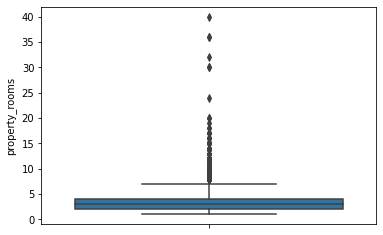

In [30]:
sns.boxplot(y=train_properati_limpio.property_rooms)
plt.show()

Podemos observar que existen outliers univariados en la variable Property Rooms y que son aquellos que tienen un valor mayor a siete. Procedemos a identificarlos y eliminarlos del DataFrame.

In [31]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_rooms']>10]
outlier.shape

(109, 20)

In [32]:
#Eliminación de outlier por ínidce de fila
indice_outlier=outlier.index
train_properati_limpio.drop(indice_outlier, inplace=True)

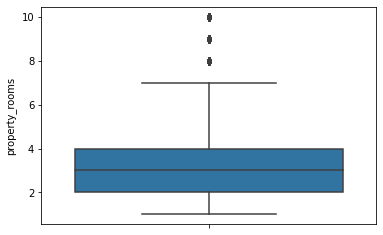

In [33]:
sns.boxplot(y=train_properati_limpio.property_rooms)
plt.show()

Graficamos nuevamente y observamos que continúan habiendo outliers esta vez con un valor mayor a siete, así que repetimos el proceso.

In [34]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_rooms']>7]
outlier.shape

(508, 20)

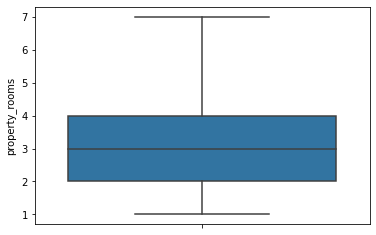

In [35]:
#Eliminación de outlier por ínidce de fila
indice_outlier=outlier.index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_rooms)
plt.show()

Ahora observamos que en el gráfico no se muestran outliers.

Además probamos que sucedería si en vez de utilizar el Análisis de Box-Plot, hubiesemos aplicado Z-Score.

In [36]:
#z-score Property Rooms
media_property_rooms=np.mean(train_properati_limpio.property_rooms)
std_property_rooms=np.std(train_properati_limpio.property_rooms)
train_properati_limpio['z_property_rooms']=(train_properati_limpio.property_rooms - media_property_rooms)/std_property_rooms

In [37]:
train_properati_limpio[train_properati_limpio['z_property_rooms']>3]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,...,operation,property_type,property_price,property_currency,property_title,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,z_property_rooms
70,bw1T+F5uUyPCgjiZTuzJFg==,2021-12-23,2022-02-09,2021-12-23,-34.629659,-58.388987,Capital Federal,Constitución,NaN,NaN,...,Venta,Casa,185000.0,USD,"Vivienda u oficina, casa en Constitución CABA.",7.0,5.0,276.0,206.0,3.32932
76,TARZKYjauC72pZ96SIKjXg==,2021-07-14,2021-08-12,2021-07-14,-34.590923,-58.384214,Capital Federal,Recoleta,NaN,NaN,...,Venta,Departamento,1900000.0,USD,VENTA increible DUPLEX en Torre Alvear 318 m2 ...,7.0,3.0,318.0,318.0,3.32932
182,rveI+SmujzZkFyUAjyIGGQ==,2021-08-24,2021-08-24,2021-08-24,-34.574127,-58.479163,Capital Federal,Villa Urquiza,NaN,NaN,...,Venta,Casa,400000.0,USD,CASA 7 AMB URQUIZA COCHERA TERRAZA PARRILLA PATIO,7.0,6.0,282.0,282.0,3.32932
322,jcbaF9BJv3MPt+Sh1XIGfA==,2021-10-14,9999-12-31,2021-10-14,-34.607374,-58.385288,Capital Federal,Monserrat,NaN,NaN,...,Venta,Departamento,278000.0,USD,Imponente departamento en el Pasaje Rodolfo Ri...,7.0,4.0,173.0,173.0,3.32932
388,0Re/9YT3DeaeRcRAmKtfdg==,2021-12-22,2022-05-19,2021-12-22,-34.595903,-58.428395,Capital Federal,Villa Crespo,NaN,NaN,...,Venta,Casa,598000.0,USD,"CASA DE 7 AMBIENTES DEPENDENCIA, JARDÍN, TER...",7.0,4.0,405.0,260.0,3.32932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74668,cpyW6MNb5IyNagnO1xrtgw==,2021-05-19,2021-06-05,2021-05-19,-34.597737,-58.393158,Capital Federal,Recoleta,NaN,NaN,...,Venta,Departamento,760000.0,USD,"Excelente departameto en Av. Callao, esquina G...",7.0,4.0,244.0,240.0,3.32932
74745,n6Sbx0ifLQ6e6CUVQWmqlw==,2021-12-16,2022-02-09,2021-12-16,-34.594816,-58.423898,Capital Federal,Palermo,NaN,NaN,...,Venta,Casa,645000.0,USD,Venta Casa en 2 Block,7.0,4.0,177.0,137.0,3.32932
75247,mojEYSWEgnlu3n3qprcHRg==,2021-07-19,2022-07-22,2021-07-19,-34.668955,-58.484292,Capital Federal,Villa Lugano,NaN,NaN,...,Venta,Casa,198000.0,USD,Casa - Villa Lugano,7.0,4.0,222.2,188.0,3.32932
75308,S241uFA7udBOmNffEySPxg==,2021-02-26,2021-10-30,2021-02-26,-34.594110,-58.377690,Capital Federal,Recoleta,NaN,NaN,...,Venta,Casa,599000.0,USD,EXCELENTE DUPLEX - 2 SEMIPISOS - 7 (SIETE) AMB...,7.0,6.0,380.0,380.0,3.32932


En total eliminamos 524 outliers que tenian un valor en property_rooms mayor a 7.

##### Property bedrooms

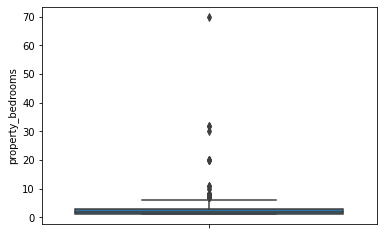

In [38]:
sns.boxplot(y=train_properati_limpio.property_bedrooms)
plt.show()

Existen outliers univariados en la variable Property bedooms.

In [39]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_bedrooms']>10]
outlier.shape

(10, 21)

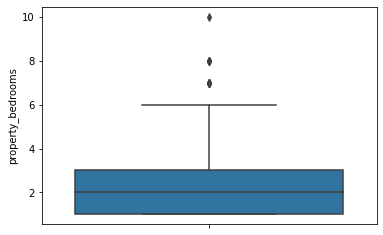

In [40]:
#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_bedrooms']>10].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_bedrooms)
plt.show()

In [41]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_bedrooms']>6]
outlier.shape

(16, 21)

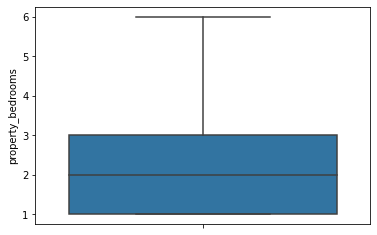

In [42]:
#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_bedrooms']>6].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_bedrooms)
plt.show()

En total eliminamos 16 outliers que tenian un valor en property_bedrooms mayor a 6.

##### Property surface total

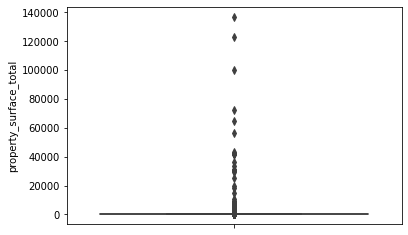

In [43]:
sns.boxplot(y=train_properati_limpio.property_surface_total)
plt.show()

Existen outliers univariados en la variable Property surface total con valores mayores a 20.000 en principio.


In [44]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_surface_total']>20000]
outlier.shape

(21, 21)

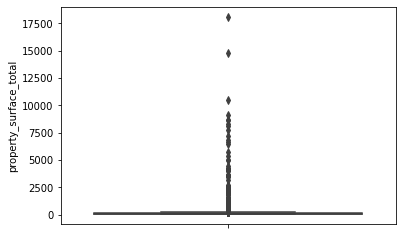

In [45]:
#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_surface_total']>20000].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_surface_total)
plt.show()

In [46]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_surface_total']>2500]
outlier.shape

(32, 21)

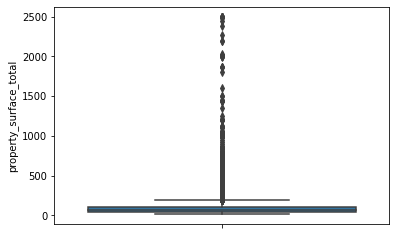

In [47]:
#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_surface_total']>2500].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_surface_total)
plt.show()

In [48]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_surface_total']>500]
outlier.shape

(340, 21)

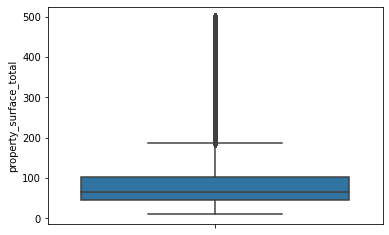

In [49]:
#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_surface_total']>500].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_surface_total)
plt.show()

In [50]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_surface_total']>200]
outlier.shape

(5004, 21)

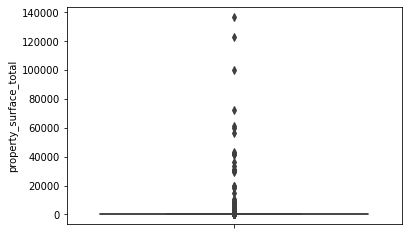

In [51]:
#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_surface_total']>200].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_surface_total)

In [52]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_surface_total']>175]
outlier.shape

(1824, 21)

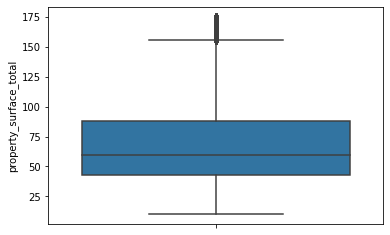

In [53]:
#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_surface_total']>175].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_surface_total)

In [54]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_surface_total']>150]
outlier.shape

(2484, 21)

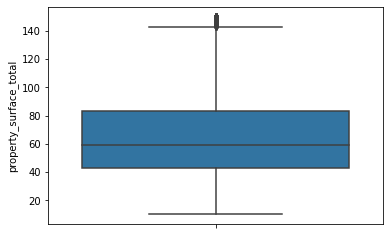

In [55]:
#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_surface_total']>150].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_surface_total)

In [56]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_surface_total']>140]
outlier.shape

(1387, 21)

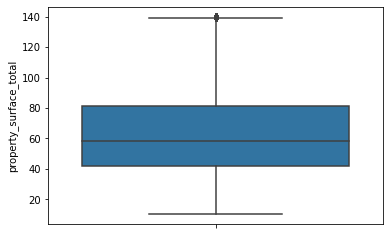

In [57]:
#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_surface_total']>140].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_surface_total)

TODO: Queda algún outliner en la frontera. Habrá que sacarlo?
Calcular cantidad de outliners encontrados. Muchas dudas con estos númerso

En total eliminamos 10423 outliers que tenian un valor en property_surface_total mayor a 140. Habria que hacer un tratamiento distinto a eliminarlos porque se pierde mucha informacion al eliminar tantas muestras

##### Property surface covered

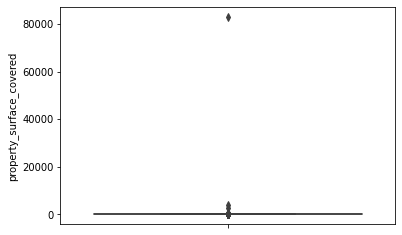

In [58]:
sns.boxplot(y=train_properati_limpio.property_surface_covered)
plt.show()

Al igual que en el caso anterior, encontramos outliners en la variable con valores por lo menos mayores a 50.000.

In [59]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_surface_covered']>50000]
outlier.shape

(1, 21)

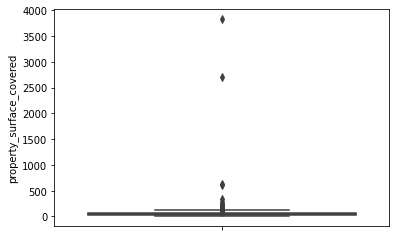

In [60]:
#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_surface_covered']>50000].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_surface_covered)
plt.show()

In [61]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_surface_covered']>1000]
outlier.shape

(2, 21)

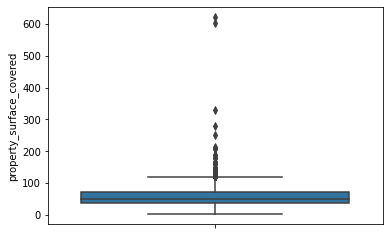

In [62]:
#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_surface_covered']>1000].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_surface_covered)
plt.show()

In [63]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_surface_covered']>200]
outlier.shape

(8, 21)

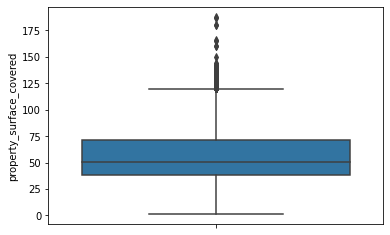

In [64]:
#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_surface_covered']>200].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_surface_covered)
plt.show()

In [65]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_surface_covered']>125]
outlier.shape

(648, 21)

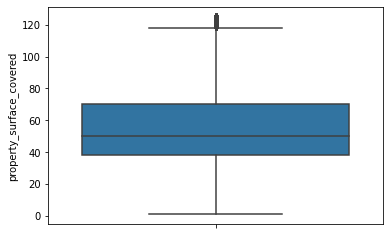

In [66]:
#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_surface_covered']>125].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_surface_covered)
plt.show()

In [67]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_surface_covered']>120]
outlier.shape

(384, 21)

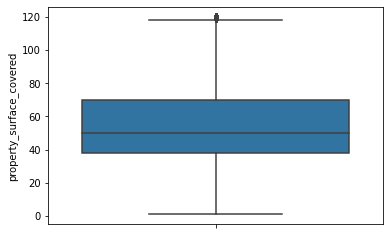

In [68]:
#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_surface_covered']>120].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_surface_covered)
plt.show()

TODO: Queda algún outliner en la frontera. Habrá que sacarlos?

En total eliminamos 1646 outliers que tenian un valor en property_surface_covered mayor a 120.

##### Property price

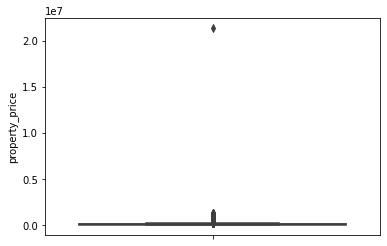

In [69]:
sns.boxplot(y=train_properati_limpio.property_price)
plt.show()

Existen outliers para la variable, en principio mayores a 5000000.

In [70]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_price']>5000000]
outlier.shape

(1, 21)

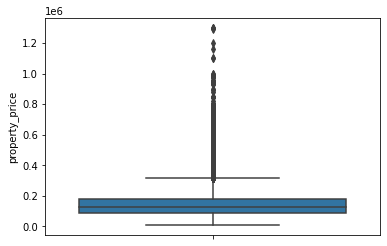

In [71]:
#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_price']>5000000].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_price)
plt.show()

(561, 21)


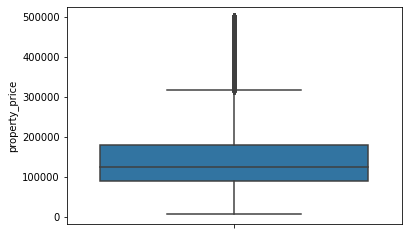

In [72]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_price']>500000]
print(outlier.shape)

#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_price']>500000].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_price)
plt.show()

(740, 21)


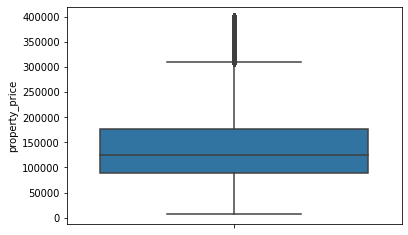

In [73]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_price']>400000]
print(outlier.shape)

#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_price']>400000].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_price)
plt.show()

(2338, 21)


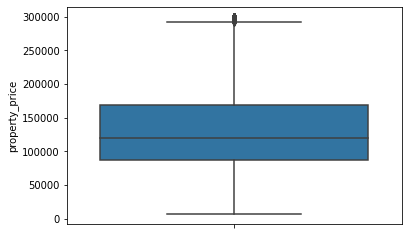

In [74]:
#Observación anómala
outlier=train_properati_limpio[train_properati_limpio['property_price']>300000]
print(outlier.shape)

#Eliminación de outlier por ínidce de fila
indice_outlier=train_properati_limpio[train_properati_limpio['property_price']>300000].index
train_properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=train_properati_limpio.property_price)
plt.show()

TODO: Queda algún outliner en la frontera. Habrá que sacarlo?

En total eliminamos 3666 outliers que tenian un valor en property_price mayor a 300000.

Como vemos, encontramos outliers en todos los atributos, procedemos eliminando las muestras que los tienen y decidimos tratarlos de esta forma porque en todos los casos se eliminan menos del 1% del total de muestras.
Salvo por el caso de los outliers en el atributo surface_total la cual cuenta con 10423 outliers por lo que si los eliminamos estariamos perdiendo mucha informacion, en este caso conviene hacer otro tratamiento

GRAFICAMOS LAS DISTRIBUCIONES DE LAS VARIABLES DESPUES DE LA IMPUTACION DE DATOS FALTANTES

Y GRAFICAMOS NUEVAMENTE EL MAPA DE CALOR DE LA COVARIANZA ENTRE LAS VARIABLES (CON LA ACTULAZACION DE SUS VALORES)

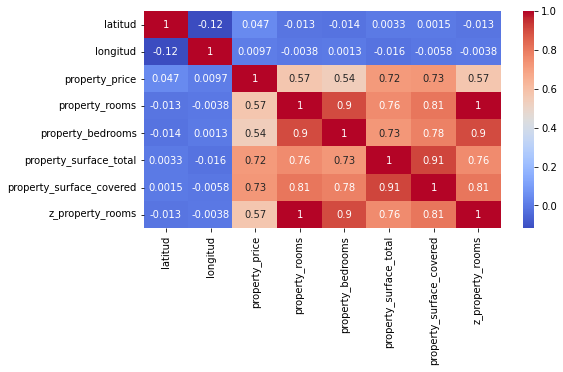

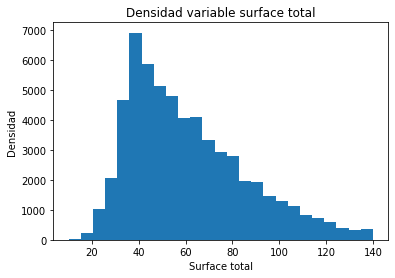

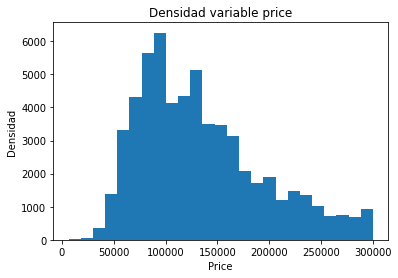

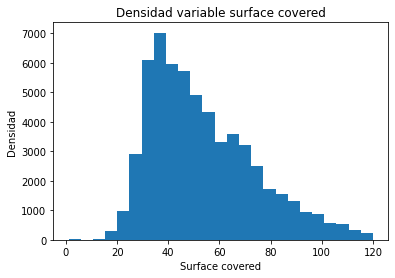

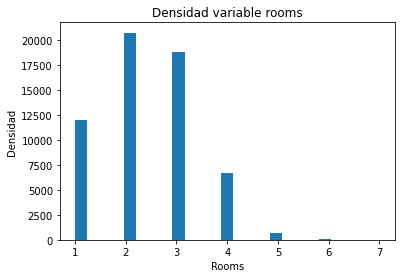

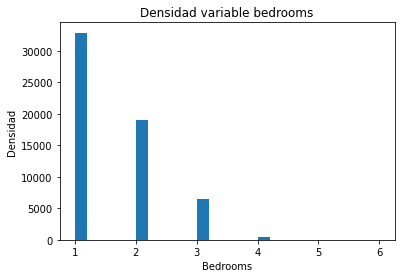

In [75]:
#Heatmap de la correlacion de Pearson entre las variables

matriz_corr_properati = train_properati_limpio.corr()

plt.figure(figsize = (8,4))
sns.heatmap(matriz_corr_properati, annot = True, cmap='coolwarm')
plt.show()

#Superficie total
plt.title('Densidad variable surface total')
plt.hist(train_properati_limpio['property_surface_total'], bins = 25 , alpha = 1)
plt.xlabel("Surface total")
plt.ylabel("Densidad")
plt.show()
#sns_hist=sns.histplot(data=properati_limpio['property_surface_total'], kde=True, alpha = 1).set(title="Densidad variable surface",xlabel="Surface",ylabel="Densidad")
#plt.show()

#Precio
plt.title('Densidad variable price')
plt.hist(train_properati_limpio['property_price'], bins = 25 , alpha = 1)
plt.xlabel("Price")
plt.ylabel("Densidad")
plt.show()
#sns_hist=sns.histplot(data=properati_limpio['property_price'], kde=True, alpha = 1).set(title="Densidad variable price",xlabel="Price",ylabel="Densidad")
#plt.show()

#Superficie covered
plt.title('Densidad variable surface covered')
plt.hist(train_properati_limpio['property_surface_covered'], bins = 25 , alpha = 1)
plt.xlabel("Surface covered")
plt.ylabel("Densidad")
plt.show()
#sns_hist=sns.histplot(data=properati_limpio['property_surface_total'], kde=True, alpha = 1).set(title="Densidad variable surface",xlabel="Surface",ylabel="Densidad")
#plt.show()

#Rooms
plt.title('Densidad variable rooms')
plt.hist(train_properati_limpio['property_rooms'], bins = 25 , alpha = 1)
plt.xlabel("Rooms")
plt.ylabel("Densidad")
plt.show()
#sns_hist=sns.histplot(data=properati_limpio['property_surface_total'], kde=True, alpha = 1).set(title="Densidad variable surface",xlabel="Surface",ylabel="Densidad")
#plt.show()

#Bedrooms
plt.title('Densidad variable bedrooms')
plt.hist(train_properati_limpio['property_bedrooms'], bins = 25 , alpha = 1)
plt.xlabel("Bedrooms")
plt.ylabel("Densidad")
plt.show()
#sns_hist=sns.histplot(data=properati_limpio['property_surface_total'], kde=True, alpha = 1).set(title="Densidad variable surface",xlabel="Surface",ylabel="Densidad")
#plt.show()

En el heatmap de la covarianza entre los atributos post eliminar los valores atipicos vemos que hay una mayor relacion entre las variables

#### Análisis multivariado

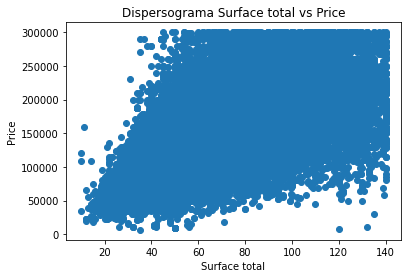

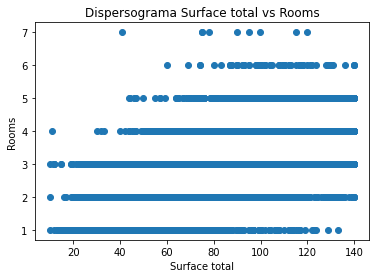

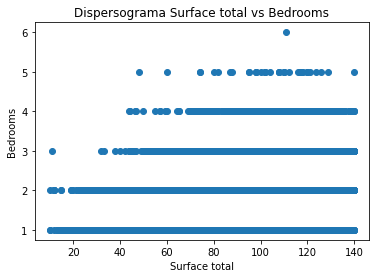

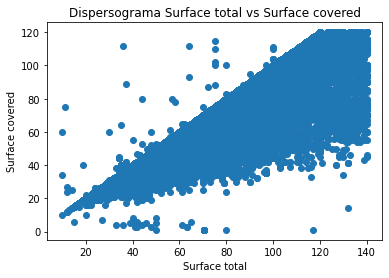

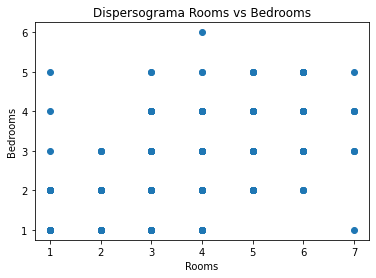

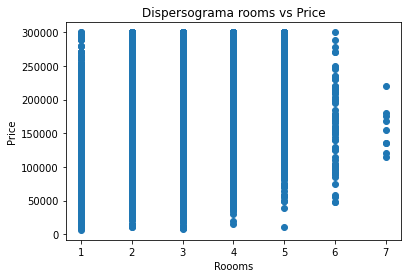

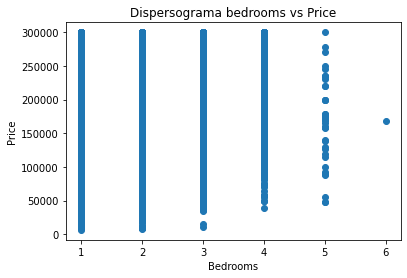

In [76]:
plt.scatter(train_properati_limpio["property_surface_total"],train_properati_limpio.property_price)
plt.title('Dispersograma Surface total vs Price')
plt.xlabel('Surface total')
plt.ylabel('Price')
plt.show()

plt.scatter(train_properati_limpio["property_surface_total"],train_properati_limpio.property_rooms)
plt.title('Dispersograma Surface total vs Rooms')
plt.xlabel('Surface total')
plt.ylabel('Rooms')
plt.show()

plt.scatter(train_properati_limpio["property_surface_total"],train_properati_limpio.property_bedrooms)
plt.title('Dispersograma Surface total vs Bedrooms')
plt.xlabel('Surface total')
plt.ylabel('Bedrooms')
plt.show()

plt.scatter(train_properati_limpio["property_surface_total"],train_properati_limpio.property_surface_covered)
plt.title('Dispersograma Surface total vs Surface covered')
plt.xlabel('Surface total')
plt.ylabel('Surface covered')
plt.show()

plt.scatter(train_properati_limpio["property_rooms"],train_properati_limpio.property_bedrooms)
plt.title('Dispersograma Rooms vs Bedrooms')
plt.xlabel('Rooms')
plt.ylabel('Bedrooms')
plt.show()

plt.scatter(train_properati_limpio["property_rooms"],train_properati_limpio.property_price)
plt.title('Dispersograma rooms vs Price')
plt.xlabel('Roooms')
plt.ylabel('Price')
plt.show()

plt.scatter(train_properati_limpio["property_bedrooms"],train_properati_limpio.property_price)
plt.title('Dispersograma bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

Grafico de surface total vs covered podemos ver que hay valores atipicos multivariados, ya que los que estan arriba de la recta y=x no tienen sentido. Es imposible que la superficie covered sea mas grande que la total

Grafico superficie total vs precio vemos que hay propiedades con mas de 120 metros que tienen un precio cercano a 0. Son claramente valores a eliminar

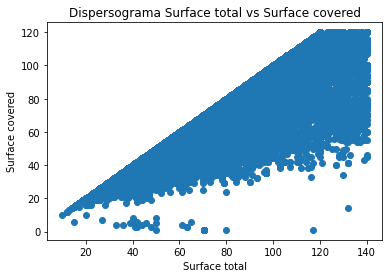

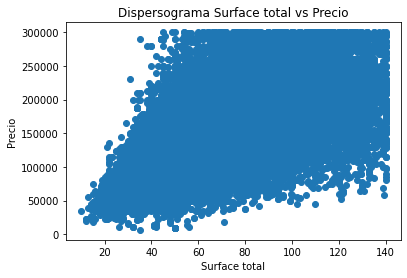

In [77]:
#ELIMINAMOS PROPIEDADES QUE TENGAN MAYOR SURFACE COVERED QUE TOTAL

indice_outlier=train_properati_limpio[train_properati_limpio['property_surface_total'] < train_properati_limpio['property_surface_covered']].index
train_properati_limpio.drop(indice_outlier, inplace=True)

plt.scatter(train_properati_limpio["property_surface_total"],train_properati_limpio.property_surface_covered)
plt.title('Dispersograma Surface total vs Surface covered')
plt.xlabel('Surface total')
plt.ylabel('Surface covered')
plt.show()

#ELIMINAMOS PROPIEDADES QUE VALGAN MENOS DE 50000 Y TENGAN IGUAL O MAS DE 120 METROS DE SUPERFICIE TOTAL

indice_outlier=train_properati_limpio[(train_properati_limpio['property_surface_total'] >= 120) & (train_properati_limpio["property_price"] <= 50000)].index
train_properati_limpio.drop(indice_outlier, inplace=True)

plt.scatter(train_properati_limpio["property_surface_total"],train_properati_limpio.property_price)
plt.title('Dispersograma Surface total vs Precio')
plt.xlabel('Surface total')
plt.ylabel('Precio')
plt.show()

In [78]:
#Como queda el dataset de train despues de los tratamientos:

train_properati_limpio.shape

(58840, 21)

Eliminando todos los valores atipicos en los atributos del dataset train perdemos alrededor de 22% de la informacion, aceptamos esta perdida de informacion a cambio de una mayor calidad en los datos.

### Reducción de la dimensionalidad

TODO: explicar un poco qué es lo que se hizo en esta parte.

In [79]:
from sklearn.preprocessing import StandardScaler

train_properati_limpio['property_type_nominal'] = pd.factorize(train_properati_limpio.property_type)[0]
test_properati_limpio['property_type_nominal'] = pd.factorize(test_properati_limpio.property_type)[0]

columnas_elegidas = ['property_rooms', 'property_bedrooms', 'property_price', 'property_surface_covered', 'property_surface_total', 'property_type_nominal']

x = train_properati_limpio.loc[:, columnas_elegidas].values
x = StandardScaler().fit_transform(x)

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6) #Luego veremos como determinar la cantidad de componentes
x_transformada = pca.fit_transform(x)

pca_df_aux = pd.DataFrame(data = x_transformada
             , columns = ['cp_1', 'cp_2','cp_3','cp_4','cp_5','cp_6'])

In [81]:
pca.explained_variance_ratio_

array([0.67775281, 0.16231528, 0.09283774, 0.03851905, 0.01612415,
       0.01245097])

In [82]:
pca.get_covariance()

array([[1.000017  , 0.90127534, 0.57356481, 0.81154224, 0.75933693,
        0.21966935],
       [0.90127534, 1.000017  , 0.5398219 , 0.78401331, 0.72600425,
        0.19592427],
       [0.57356481, 0.5398219 , 1.000017  , 0.72757774, 0.71956377,
        0.05033905],
       [0.81154224, 0.78401331, 0.72757774, 1.000017  , 0.91544119,
        0.22458196],
       [0.75933693, 0.72600425, 0.71956377, 0.91544119, 1.000017  ,
        0.31242641],
       [0.21966935, 0.19592427, 0.05033905, 0.22458196, 0.31242641,
        1.000017  ]])

In [83]:
pca_df_aux['target'] = pd.factorize(train_properati_limpio.property_type)[0]             #necesito que los valores 'Casa','Departamento','PH' pasarlas a numeros, y que quede 0, 1, 2 

                                                                                #le agrego una variable a pca_df_aux que pone target = 0 si properati_limpio.property_type = 'Departamento', target = 1 si property_type
                                                                         

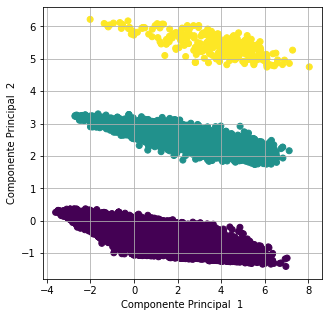

In [84]:
fig = plt.figure(figsize = (5,5))
ax= fig.add_subplot(1,1,1) 

ax.scatter(x=pca_df_aux['cp_1'],y=pca_df_aux['cp_2'],c=pca_df_aux['target'])
ax.set_xlabel('Componente Principal  1', fontsize = 10)
ax.set_ylabel('Componente Principal  2', fontsize = 10)
ax.grid()

plt.show()

## Agrupamiento

In [85]:
properati = train_properati_limpio
properati_cluster = properati.drop(columns=['id', 'start_date','end_date','created_on','property_title','property_currency','property_type','place_l2','place_l3','place_l4','place_l5','place_l6','operation','latitud','longitud'])

# dataset solo numerico y sin datos nulos

In [86]:
%pip install pyclustertend
from pyclustertend import hopkins

hopkins(properati_cluster,properati_cluster.shape[0])
#hopkins(train_properati_limpio["property_price"], train_properati_limpio["property_surface_total"])
#Esto tira error porque se ve que esta funcion necesita numpy version 1.20 o menos. Y la ultima (la que tnenemos es: 1.23)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0.032814159355110235

Análisis de Silhouette

In [87]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

list_k = list(range(2, 5))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(properati_cluster)

    score = silhouette_score (properati_cluster, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =2 silhouette score is 0.6158231791240827
For n_clusters =3 silhouette score is 0.5746569759697502
For n_clusters =4 silhouette score is 0.5663903594349591


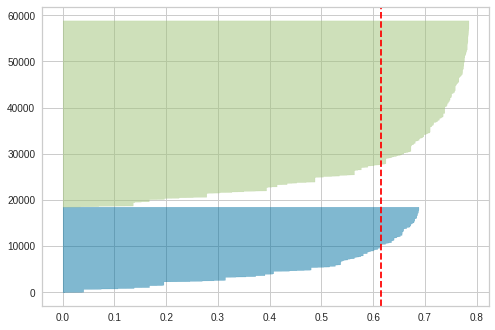

In [88]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(2, random_state=0)                          ##elijo 13 porque si no queda 

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(properati_cluster)
plt.show()

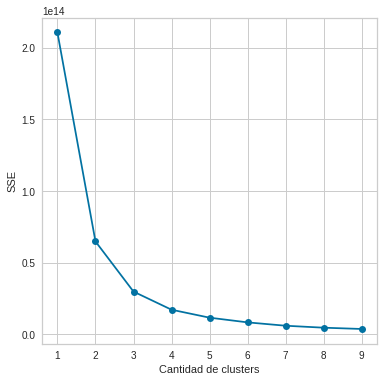

In [89]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(properati_cluster)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

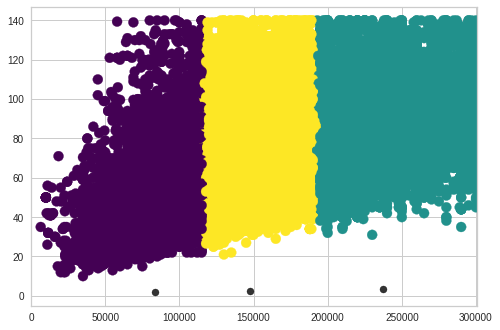

In [90]:
kmeans = KMeans(n_clusters=3)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento

kmeans.fit(properati_cluster) #Entrenamos el algoritmo para que aprenda cómo agrupar

y_kmeans = kmeans.predict(properati_cluster)

plt.scatter(train_properati_limpio.property_price, train_properati_limpio.property_surface_total, c=y_kmeans, s=100, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8,marker='.')
plt.xlim([0, 301000])
plt.show()

Acá vemos 3 grupos marcadas, en donde no importan la cantidad de metros de superficie total, sino su precio

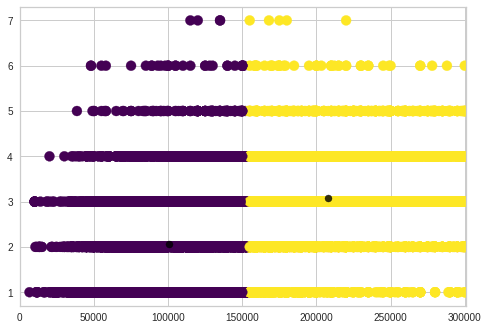

In [91]:
kmeans = KMeans(n_clusters=2)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento

kmeans.fit(properati_cluster) #Entrenamos el algoritmo para que aprenda cómo agrupar

y_kmeans = kmeans.predict(properati_cluster)

plt.scatter(train_properati_limpio.property_price, train_properati_limpio.property_rooms, c=y_kmeans, s=100, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8,marker='.')
plt.xlim([0, 301000])
plt.show()

Este grafico nos muestra que se arman dos grupos bien marcados en la recta de los 150000, apartir de ahi sea cual sea la cantidad de ambientes la propiedad pasa a ser de otro grupo. Se podria interpretar como que pasa a ser mas cara

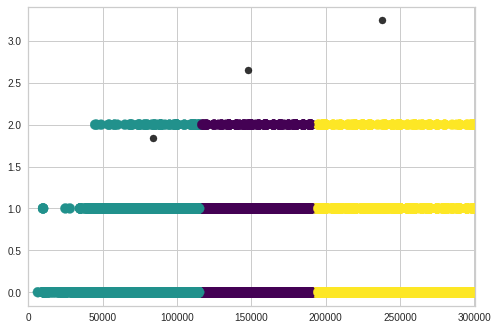

In [92]:
kmeans = KMeans(n_clusters=3)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento

kmeans.fit(properati_cluster) #Entrenamos el algoritmo para que aprenda cómo agrupar

y_kmeans = kmeans.predict(properati_cluster)

plt.scatter(train_properati_limpio.property_price, train_properati_limpio.property_type_nominal, c=y_kmeans, s=100, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8,marker='.')
plt.xlim([0, 300100])
plt.show()

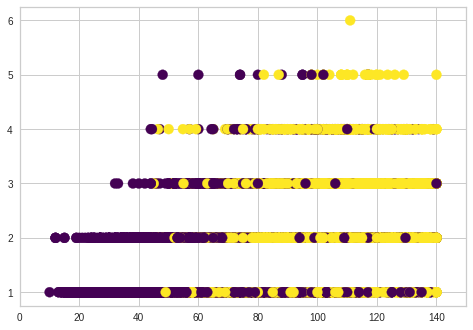

In [93]:
kmeans = KMeans(n_clusters=2)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento

kmeans.fit(properati_cluster) #Entrenamos el algoritmo para que aprenda cómo agrupar

y_kmeans = kmeans.predict(properati_cluster)

plt.scatter(train_properati_limpio.property_surface_total, train_properati_limpio.property_bedrooms, c=y_kmeans, s=100, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8,marker='.')
plt.xlim([0, 150])
plt.show()

En este grafico no se ven tan marcados los grupos. Pero se puede visualizar una recta diagonal que divide la mayoria de los puntos amarillos los cuales tienen hasta 3 habitaciones cuando su superficie total es menor a 80 metros (primer grupo). A partir de 80 metros en adelante la cantidad de habitaciones empieza a subir hasta un total de 6 (segundo grupo)

## Clasificación

### Construcción del target


In [108]:
pxm2_train = []

for i in range(len(train_properati_limpio)):
        pxm2_train.append(train_properati_limpio.iloc[i]["property_price"] / train_properati_limpio.iloc[i]["property_surface_total"])

train_properati_limpio["pxm2"] = pxm2_train

print(train_properati_limpio["pxm2"].describe())

pxm2_test = []

for i in range(len(test_properati_limpio)):
        pxm2_test.append(test_properati_limpio.iloc[i]["property_price"] / test_properati_limpio.iloc[i]["property_surface_total"])

test_properati_limpio["pxm2"] = pxm2_test

print(test_properati_limpio["pxm2"].describe())

count    58840.000000
mean      2263.356999
std        668.165510
min        185.714286
25%       1812.500000
50%       2204.081633
75%       2636.815920
max       8285.714286
Name: pxm2, dtype: float64
count    18850.000000
mean      2402.454375
std       1163.301782
min          1.648387
25%       1787.275125
50%       2250.000000
75%       2771.412075
max      55859.367188
Name: pxm2, dtype: float64


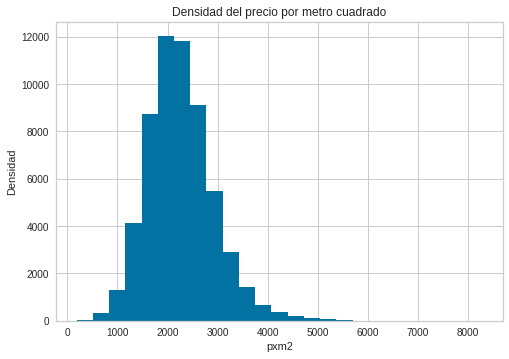

[Text(0, 0.5, 'pxm2'),
 Text(0.5, 0, 'Property_type'),
 Text(0.5, 1.0, 'Gráfico de violín Precio por metro cuadrado vrs Tipo de propiedad')]

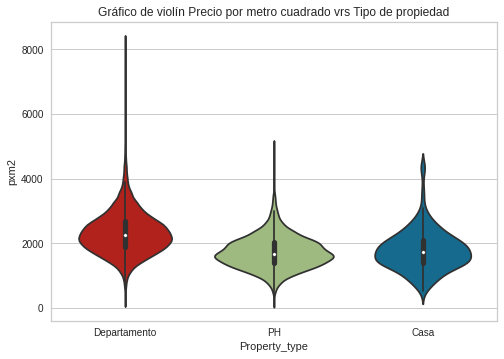

In [109]:
#Distribución del precio por metro cuadrado
plt.title('Densidad del precio por metro cuadrado')
plt.hist(train_properati_limpio['pxm2'], bins = 25 , alpha = 1)
plt.xlabel("pxm2")
plt.ylabel("Densidad")
plt.show()

sns.violinplot(x="property_type", y="pxm2", data=train_properati_limpio,palette=["r", "g", "b"]).set(title="Gráfico de violín Precio por metro cuadrado vrs Tipo de propiedad",xlabel='Property_type',ylabel='pxm2') 

Mostramos la distribución del precio por metro cuadrado y la distribución del precio por metro cuadrado por el tipo de propiedad.

#### Limites de la variable tipo_precio

##### Alternativa 1: Igual cantidad de observaciones

Dividir la variable pxm2 en 3 intervalos con igual cantidad de observaciones.

In [110]:
intervalos = round(len(train_properati_limpio) / 3)
print(intervalos)

limite_bajo = train_properati_limpio.sort_values("pxm2").iloc[intervalos]["pxm2"]
print(limite_bajo)

limite_alto = train_properati_limpio.sort_values("pxm2").iloc[intervalos*2]["pxm2"]
print(limite_alto)

print(train_properati_limpio[train_properati_limpio["pxm2"] < limite_bajo].shape)
print(train_properati_limpio[(train_properati_limpio["pxm2"] >= limite_bajo) & (train_properati_limpio["pxm2"] < limite_alto)].shape)
print(train_properati_limpio[train_properati_limpio["pxm2"] >= limite_alto].shape)


19613
1951.219512195122
2484.848484848485
(19610, 23)
(19615, 23)
(19615, 23)


In [111]:
tipo_precio_1 = []

for i in range(len(train_properati_limpio)):
  if train_properati_limpio.iloc[i]["pxm2"] < limite_bajo:
      tipo_precio_1.append("bajo")
  elif train_properati_limpio.iloc[i]["pxm2"] < limite_alto:
       tipo_precio_1.append("medio")
  else:
    tipo_precio_1.append("alto")

train_properati_limpio["tipo_precio_1"] = tipo_precio_1

print(train_properati_limpio["tipo_precio_1"].describe())

count     58840
unique        3
top       medio
freq      19615
Name: tipo_precio_1, dtype: object


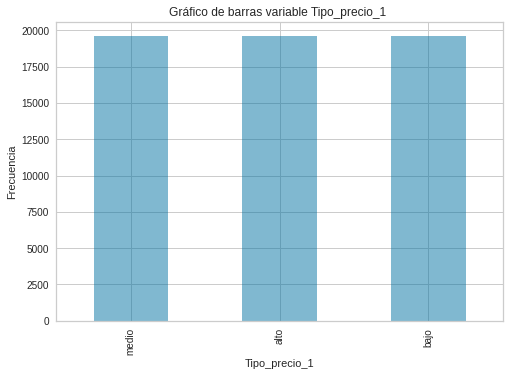

In [112]:
#Distribución de la variable tipo_precio_1
train_properati_limpio['tipo_precio_1'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable Tipo_precio_1 " , xlabel="Tipo_precio_1" , ylabel="Frecuencia")

Mostramos gráficamente la distribución de la
nueva variable creada tipo_precio_1 donde cada categoría tiene igual cantidad de observaciones.

##### Alternativa 2: 1er intervalo con 25%, 2ndo con 50% y 3ero con 25%

In [113]:
cuartil = round(len(train_properati_limpio) * 0.25)
print(cuartil)
limite_bajo = train_properati_limpio.sort_values("pxm2").iloc[cuartil]["pxm2"]
print(limite_bajo)

limite_alto = train_properati_limpio.sort_values("pxm2").iloc[cuartil* 3 ]["pxm2"]
print(limite_alto)

print(train_properati_limpio[train_properati_limpio["pxm2"] < limite_bajo].shape)
print(train_properati_limpio[(train_properati_limpio["pxm2"] >= limite_bajo) & (train_properati_limpio["pxm2"] < limite_alto)].shape)
print(train_properati_limpio[train_properati_limpio["pxm2"] >= limite_alto].shape)

14710
1812.5
2636.81592039801
(14692, 24)
(29408, 24)
(14740, 24)


In [114]:
tipo_precio_2 = []

for i in range(len(train_properati_limpio)):
  if train_properati_limpio.iloc[i]["pxm2"] < limite_bajo:
      tipo_precio_2.append("bajo")
  elif train_properati_limpio.iloc[i]["pxm2"] < limite_alto:
       tipo_precio_2.append("medio")
  else:
    tipo_precio_2.append("alto")

train_properati_limpio["tipo_precio_2"] = tipo_precio_2

print(train_properati_limpio["tipo_precio_2"].describe())

count     58840
unique        3
top       medio
freq      29408
Name: tipo_precio_2, dtype: object


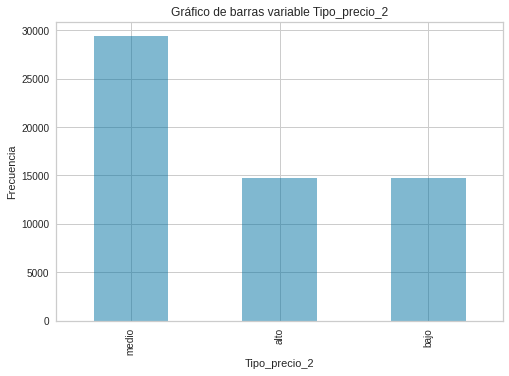

In [115]:
#Distribución de la variable tipo_precio_2
train_properati_limpio['tipo_precio_2'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable Tipo_precio_2" , xlabel="Tipo_precio_2" , ylabel="Frecuencia")

##### Alternativa 3: Variable pxm2 relativa a cada tipo de propiedad y luego divida como en la alternativa 2

Calculamos los límites correspondientes al 25& y 75% para cada tipo de propiedad.

In [121]:
train_properati_limpio_casa = train_properati_limpio[train_properati_limpio.property_type.isin(['Casa'])]
cuartil = round(len(train_properati_limpio_casa) * 0.25)
limite_bajo_casa = train_properati_limpio_casa.sort_values("pxm2").iloc[cuartil]["pxm2"]
limite_alto_casa = train_properati_limpio_casa.sort_values("pxm2").iloc[cuartil * 3]["pxm2"]

train_properati_limpio_ph = train_properati_limpio[train_properati_limpio.property_type.isin(['PH'])]
cuartil = round(len(train_properati_limpio_ph) * 0.25)
limite_bajo_ph = train_properati_limpio_ph.sort_values("pxm2").iloc[cuartil]["pxm2"]
limite_alto_ph = train_properati_limpio_ph.sort_values("pxm2").iloc[cuartil * 3]["pxm2"]

train_properati_limpio_depto = train_properati_limpio[train_properati_limpio.property_type.isin(['Departamento'])]
cuartil = round(len(train_properati_limpio_depto) * 0.25)
limite_bajo_depto = train_properati_limpio_depto.sort_values("pxm2").iloc[cuartil]["pxm2"]
limite_alto_depto = train_properati_limpio_depto.sort_values("pxm2").iloc[cuartil * 3]["pxm2"]


13331


In [122]:

tipo_precio_3 = []

for i in range(len(train_properati_limpio)):
  if train_properati_limpio.iloc[i]["property_type"] == "Casa":
    if train_properati_limpio.iloc[i]["pxm2"] < limite_bajo_casa:
      tipo_precio_3.append("bajo_casa")
    elif train_properati_limpio.iloc[i]["pxm2"] < limite_alto_casa:
      tipo_precio_3.append("medio_casa")
    else:
      tipo_precio_3.append("alto_casa")
    
  elif train_properati_limpio.iloc[i]["property_type"] == "PH":
    if train_properati_limpio.iloc[i]["pxm2"] < limite_bajo_ph:
      tipo_precio_3.append("bajo_ph")
    elif train_properati_limpio.iloc[i]["pxm2"] < limite_alto_ph:
      tipo_precio_3.append("medio_ph")
    else:
      tipo_precio_3.append("alto_ph")

  else:
    if train_properati_limpio.iloc[i]["pxm2"] < limite_bajo_depto:
      tipo_precio_3.append("bajo_depto")
    elif train_properati_limpio.iloc[i]["pxm2"] < limite_alto_depto:
      tipo_precio_3.append("medio_depto")
    else:
      tipo_precio_3.append("alto_depto")

train_properati_limpio["tipo_precio_3"] = tipo_precio_3

print(train_properati_limpio["tipo_precio_3"].describe())

count           58840
unique              9
top       medio_depto
freq            26749
Name: tipo_precio_3, dtype: object


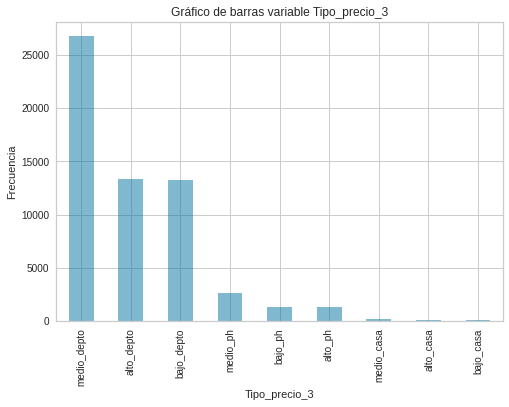

In [123]:
#Distribución de la variable tipo_precio_3
train_properati_limpio['tipo_precio_3'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable Tipo_precio_3" , xlabel="Tipo_precio_3" , ylabel="Frecuencia")

##### Comparación de alternativas

Elegimos la alternativa 2 por sobre las otras porque la mayoria de las propiedades cuenta con un precio por metro cuadrado medio (en funcion de esta y las demas alternativas) por lo que tiene sentido que el porcentaje de observaciones sea mayor en categoria

In [124]:
#Eliminamos los otros dos tipo_precio:

tipo_precio_eliminar = ["tipo_precio_1", "tipo_precio_2", "tipo_precio_3"]
train_properati_limpio.drop(tipo_precio_eliminar, axis="columns", inplace=True)

train_properati_limpio["tipo_precio"] = tipo_precio_2

#Y hacemos lo mismo con el dataset de test

tipo_precio_2_test = []

for i in range(len(test_properati_limpio)):
  if test_properati_limpio.iloc[i]["pxm2"] < limite_bajo:
      tipo_precio_2_test.append("bajo")
  elif test_properati_limpio.iloc[i]["pxm2"] < limite_alto:
       tipo_precio_2_test.append("medio")
  else:
    tipo_precio_2_test.append("alto")

test_properati_limpio["tipo_precio"] = tipo_precio_2_test

print(test_properati_limpio["tipo_precio"].describe())

count     18850
unique        3
top       medio
freq       8188
Name: tipo_precio, dtype: object


In [125]:
test_properati_limpio.head(5)
train_properati_limpio.head(1)

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,...,property_currency,property_title,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,z_property_rooms,property_type_nominal,pxm2,tipo_precio
0,E7EU1k5VaKCQOw/z08WRPA==,2021-10-21,2021-11-06,2021-10-21,-34.622479,-58.438077,Capital Federal,Caballito,NaN,NaN,...,USD,GRAN OPORTUNIDAD. Nuevo Precio. 3 ambientes a...,3.0,2.0,77.0,74.0,0.174238,0,1687.012987,bajo


### Entrenamiento y Predicción

#### Modelo 1: Árbol de decisión


['medio' 'alto' 'medio' ... 'medio' 'medio' 'medio']


Text(51.0, 0.5, 'True')

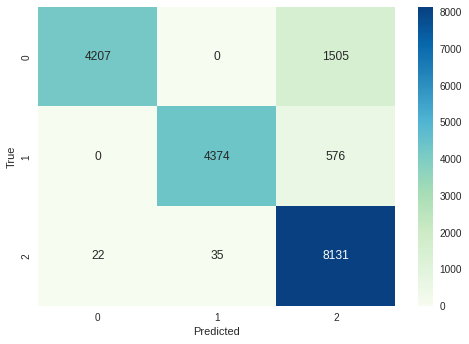

In [126]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#Variables que no vamos a tener en cuenta para el modelo
variables_eliminar_train = ["z_property_rooms",'id', 'start_date','end_date','created_on','property_title','property_currency','property_type','place_l2','place_l3','place_l4','place_l5','place_l6','operation','latitud','longitud',"pxm2","tipo_precio"]
variables_eliminar_test = ['id', 'start_date','end_date','created_on','property_title','property_currency','property_type','place_l2','place_l3','place_l4','place_l5','place_l6','operation','latitud','longitud',"pxm2","tipo_precio"]

x_arbol_train = train_properati_limpio.drop(columns=variables_eliminar_train, inplace=False)
y_arbol_train = train_properati_limpio["tipo_precio"].copy()
x_arbol_test = test_properati_limpio.drop(columns=variables_eliminar_test, inplace=False)
y_arbol_test = test_properati_limpio["tipo_precio"].copy()

#Creamos un clasificador con hiperparámetros 
tree_model = tree.DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 20, 
                                         min_samples_leaf=10) 
#Entrenamos el modelo
model = tree_model.fit(X = x_arbol_train, y = y_arbol_train)

y_pred = model.predict(x_arbol_test)
print(y_pred)

tabla = confusion_matrix(y_arbol_test, y_pred)

sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Guardamos en el dataset dos nuevas variables, precio por metro cuadrado y tipo_precio que tiene como posibles valores "alto, medio y bajo".

In [ ]:
#Optimizando hiperparametros
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
features = ['property_rooms', 'property_bedrooms', 'property_surface_covered', 'property_surface_total', "property_type_nominal", "pxm2"]
#Cantidad de combinaciones que quiero porbar
n=10
#es decir que me va a entrenar 10 arboles por cada split
#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.05,n), 
               'max_depth':list(range(1,5))}

#Cantidad de splits para el Cross Validation:
folds=8
#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)
#Clasificador
base_tree = DecisionTreeClassifier() 
#Metrica que quiero optimizar accuracy
scorer_fn = make_scorer(sk.metrics.accuracy_score)
#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n) 

#Busco los hiperparamtros que optimizan la metrica accuracy
randomcv.fit(x_arbol_train,y_arbol_train)

#Mejores hiperparametros del arbol
print(f"El mejor arbol que performó se obtuvo con los siguientes parametros:  {randomcv.best_params_}")
#Mejor métrica
print(f"Y el score de accurency fue de: {randomcv.best_score_}")
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_
for feat_imp,feat in sorted(zip(feat_imps,features)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

In [ ]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
arbol=DecisionTreeClassifier().set_params(**randomcv.best_params_)
#Entreno el arbol en todo el set
arbol.fit(x_arbol_train,y_arbol_train)
reglas = export_text(arbol, feature_names=list(features))
print(reglas)

from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=['alto','medio', "bajo"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


## Regresión

Modelo KNN Regresion

In [ ]:
train_properati_limpio.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
#selecciono variables regresoras y a predecir
X = train_properati_limpio[['property_rooms', 'property_bedrooms','property_surface_total','property_surface_covered','z_property_rooms']]
y = train_properati_limpio.property_price

#Separacion Train/test  (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [ ]:
#Heatmap correlación
X_train.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
#Entrenamiento con 10 Fold Cross Validation 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
import sklearn as sk

k_range = range(1,30)
k_scores = []
for k in k_range:
  knn_regressor = KNeighborsRegressor(n_neighbors = k)

  r2_score = cross_val_score(knn_regressor, X, y, cv = 10)
  k_scores.append(r2_score.mean())

print(k_scores)


In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel('value of k for knn')
plt.ylabel('Cross-Validated Acuracy')

El grafico nos muestra que a partir de 8/10 vecinos la precision no mejora mucho

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNN = KNeighborsRegressor()
pipe = Pipeline(steps=[("KNN", KNN)])
n_neighbors = [2, 3, 5, 10]
parameters = dict(KNN__n_neighbors=n_neighbors)

CV = GridSearchCV(pipe, parameters)
CV.fit(X_train, y_train)
print(best_params.best_score_)

In [ ]:
print("Best Number Of Components:", CV.best_estimator_.get_params()["KNN__n_neighbors"])
print(); print(CV.best_estimator_.get_params()["KNN"])
print(CV.best_params_)
CV_Result = cross_val_score(CV, X, y, cv=10, n_jobs=-1, scoring="r2")
print(); print(CV_Result)
print(); print(CV_Result.mean())

In [ ]:
CV.get_params()

In [ ]:
y_pred = CV.predict(X_test)

In [ ]:
performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred,
                            'Error': y_test - y_pred})

performance.head()

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("predicted data")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
import sklearn as sk

knn_regressorr= KNeighborsRegressor(n_neighbors = 10)
score = cross_val_score(best_params, X, y, cv = 10, scoring = 'neg_mean_squared_error')
mse_score = -score
rmse_score = np.sqrt(mse_score)
print(rmse_score.mean())

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
import sklearn as sk

knn_regressorr= KNeighborsRegressor(n_neighbors = 10)
score = cross_val_score(best_params, X, y, cv = 10, scoring = 'neg_root_mean_squared_error')
mse_score = -score
rmse_score = np.sqrt(mse_score)
print(rmse_score.mean())


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
import sklearn as sk

knn_regressorr= KNeighborsRegressor(n_neighbors = 10)
score = cross_val_score(best_params, X, y, cv = 10, scoring = 'neg_median_absolute_error')
mse_score = -score
rmse_score = np.sqrt(mse_score)
print(rmse_score.mean())

Modelo XGB

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import mean_squared_error

#selecciono variables regresoras y a predecir
X = train_properati_limpio[['property_rooms', 'property_bedrooms','property_surface_total','property_surface_covered','z_property_rooms']]
y = train_properati_limpio.property_price

#Separacion Train/test  (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)
#xgbr = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
#xgb.XGBRegressor(random_state=0, n_estimators=100)

xgbr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=9, max_leaves=0, min_child_weight=1,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0)


xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)
print("Training score: ", score)
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("RMSE: %.2f" % (mse**(1/2.0)))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("predicted data")
plt.legend()
plt.show()


In [ ]:

performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred,
                            'Error': y_test - y_pred})

performance.head()

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import mean_squared_error


X = train_properati_limpio[['property_rooms', 'property_bedrooms','property_surface_total','property_surface_covered','z_property_rooms']]
y = train_properati_limpio.property_price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

booster = ['gbtree','gblinear']
base_score = [0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

xgbr = xgb.XGBRegressor()
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=xgbr,
            param_distributions=hyperparameter_grid,
            cv=10, n_iter=15,
            scoring = 'neg_root_mean_squared_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,y_train)

random_cv.best_estimator_


In [ ]:
ypred = random_cv.predict(X_test)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("predicted data")
plt.legend()
plt.show()